### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data_dict={}
for i in data.columns:
    data_dict[i]=[data[i].isnull().values.sum()]
    print(i+':'+str(data[i].isnull().values.sum()))
df=pd.DataFrame.from_dict(data_dict)
df = df.loc[:, (df != 0).any(axis=0)]

destination:0
passanger:0
weather:0
temperature:0
time:0
coupon:0
expiration:0
gender:0
age:0
maritalStatus:0
has_children:0
education:0
occupation:0
income:0
car:12576
Bar:107
CoffeeHouse:217
CarryAway:151
RestaurantLessThan20:130
Restaurant20To50:189
toCoupon_GEQ5min:0
toCoupon_GEQ15min:0
toCoupon_GEQ25min:0
direction_same:0
direction_opp:0
Y:0


Plotting all the null values in the data for visualization:

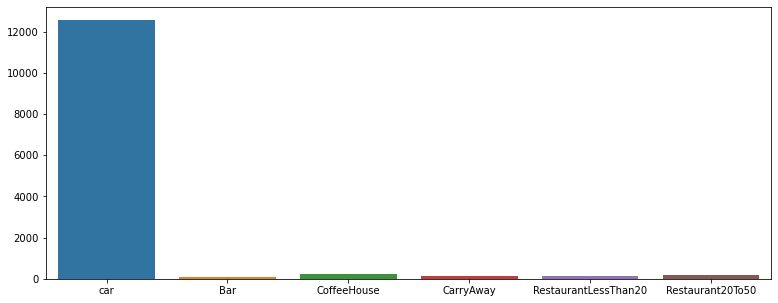

In [5]:
plt.figure(figsize=(13,5))
sns.barplot(data=df)
plt.show()

The car column has the most nan values

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
len(data['car'].dropna())

108

We'll drop the entire car column because the amount of non null values isn't significant:

In [7]:
data=data.drop(columns=['car'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

Since all the other nan columns are non integers, we'll just replace nans with the most frequent values:

In [8]:
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [9]:
data['Bar'].mode()

0    never
Name: Bar, dtype: object

In [10]:
data['Bar']=data['Bar'].fillna('never')
data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [11]:
data['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [12]:
data['CoffeeHouse'].mode()

0    less1
Name: CoffeeHouse, dtype: object

In [13]:
data['CoffeeHouse']=data['CoffeeHouse'].fillna('less1')
data['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8'], dtype=object)

In [14]:
new=np.array(data['CarryAway'].mode())
new

array(['1~3'], dtype=object)

In [15]:
data['CarryAway']=data['CarryAway'].fillna(new[0])
data['CarryAway'].unique()

array(['1~3', '4~8', 'gt8', 'less1', 'never'], dtype=object)

In [16]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [17]:
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(np.array(data['RestaurantLessThan20'].mode())[0])
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [18]:
data['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

In [19]:
data['Restaurant20To50']=data['Restaurant20To50'].fillna(np.array(data['Restaurant20To50'].mode())[0])
data['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8'], dtype=object)

4. What proportion of the total observations chose to accept the coupon? 



In [20]:
print('percentage of people which chose to accept the coupon: ',data['Y'].value_counts(1)[1])

percentage of people which chose to accept the coupon:  0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

In [21]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

We convert the bar column into a dataframe to faclitate visualization:

In [22]:
count_df=pd.DataFrame(data=data['coupon'].value_counts()).transpose()
count_df

,Coffee House,Restaurant(<20),Carry out & Take away,Bar,Restaurant(20-50)
coupon,3996,2786,2393,2017,1492


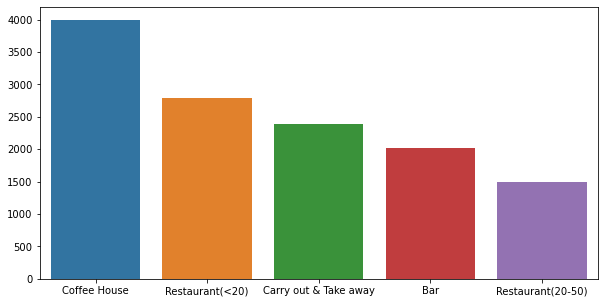

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data=count_df)
plt.show()

6. Use a histogram to visualize the temperature column.

In [24]:
data['temperature']

0        55
1        80
2        80
3        80
4        80
         ..
12679    55
12680    55
12681    30
12682    30
12683    80
Name: temperature, Length: 12684, dtype: int64

<AxesSubplot:xlabel='temperature', ylabel='Count'>

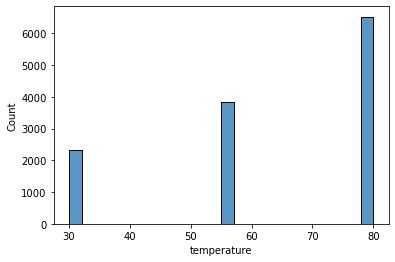

In [25]:
sns.histplot(data=data['temperature'])

plotting against 'coupon':

<AxesSubplot:xlabel='temperature', ylabel='Count'>

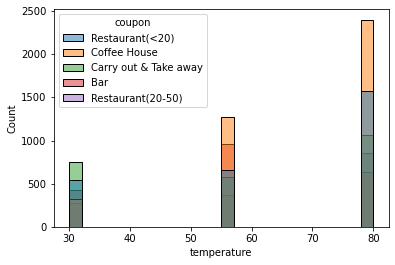

In [26]:
sns.histplot(data=data,x='temperature',hue='coupon')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [27]:
data.shape

(12684, 25)

In [28]:
bar_df=data.loc[data['coupon']=='Bar']
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [29]:
bar_df['coupon'].unique()

array(['Bar'], dtype=object)

2. What proportion of bar coupons were accepted?


In [30]:
print('The proportion of accepted bar coupons is: ',bar_df['Y'].value_counts(1)[1])

The proportion of accepted bar coupons is:  0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


We

In [31]:
print('The acceptance rate for those who went to a bar less than or equals to 3 times a month is: ',bar_df['Y'].loc[bar_df['Bar']=='1~3'].value_counts(1)[1])

The acceptance rate for those who went to a bar less than or equals to 3 times a month is:  0.6473551637279596


In [32]:
print('The acceptance rate for those who went to a bar more than 3 times a month: ',bar_df['Y'].loc[(bar_df['Bar']=='gt8')|(bar_df['Bar']=='4~8') ].value_counts(1)[1])

The acceptance rate for those who went to a bar more than 3 times a month:  0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [33]:
bar_df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [34]:
bar_df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [35]:
bar_df['age'].replace({'50plus':50,'below21':20},inplace=True)
bar_df['age'].unique()

/var/folders/8_/nr90nn9d6rb4bdpxjck429j00000gn/T/ipykernel_77215/1003817748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['age'].replace({'50plus':50,'below21':20},inplace=True)


array(['21', '46', '26', '31', '41', 50, '36', 20], dtype=object)

In [36]:
bar_df['age']=bar_df['age'].astype('int64')

/var/folders/8_/nr90nn9d6rb4bdpxjck429j00000gn/T/ipykernel_77215/3228917478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['age']=bar_df['age'].astype('int64')


In [37]:
bar_df['age'].unique()

array([21, 46, 26, 31, 41, 50, 36, 20])

In [38]:
bar_df['age'].loc[bar_df['age']>25].astype('int64').unique()

array([46, 26, 31, 41, 50, 36])

In [39]:
bar_df['Y'].loc[(bar_df['age']>25)&((bar_df['Bar']!='less1')&(bar_df['Bar']!='never'))].value_counts(1)[1]

0.6952380952380952

In [40]:
bar_df['Y'].loc[(bar_df['age']<=25)&((bar_df['Bar']=='less1')|(bar_df['Bar']=='never'))].value_counts(1)[1]

0.3932926829268293

Yes, there is a huge difference between the acceptance rates of these 2 subgroups.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [41]:
print('acceptance rate: ',bar_df['Y'].loc[(bar_df['occupation']!='Farming Fishing & Forestry')&(bar_df['passanger']!='Kid(s)')].value_counts(1)[1])

acceptance rate:  0.4326869806094183


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [42]:
print('acceptance rate: ',bar_df['Y'].loc[((bar_df['Bar']!='never')&(bar_df['Bar']!='less1'))&(bar_df['passanger']!='Kid(s)')&(bar_df['maritalStatus']!='Widowed')].value_counts(1)[1])

acceptance rate:  0.7132486388384754


In [43]:
print('acceptance rate: ',bar_df['Y'].loc[((bar_df['Bar']!='never')&(bar_df['Bar']!='less1'))&(bar_df['age']<30)].value_counts(1)[1])

acceptance rate:  0.7217391304347827


In [44]:
print('acceptance rate: ',bar_df['Y'].loc[(bar_df['RestaurantLessThan20']=='4~8')&((bar_df['income']=='37500-$49999')|(bar_df['income']=='$12500-$24999')|(bar_df['income']=='$25000-$37499')|(bar_df['income']=='Less than $12500'))].value_counts(1)[1])

acceptance rate:  0.3448275862068966


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Around 41% of the bar coupons were accepted. Customers who went to a bar more than 3 times a month were more likely to accept the coupons than those who went to a abar less than 3 times a month. The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 was higher than the acceptance rate of all the other drivers. The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry was approximately 43%. The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed and those who go to bars more than once a month and are under the age of 30 was approximately the same.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [45]:
coffee_df=data.loc[data['coupon']=='Coffee House']
coffee_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [46]:
print('The proportion of accepted Coffee House coupons is: ',coffee_df['Y'].value_counts(1)[1])

The proportion of accepted Coffee House coupons is:  0.49924924924924924


In [47]:
coffee_df['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8'], dtype=object)

In [48]:
print('The acceptance rate for those who went to a bar less than or equals to 3 times a month is: ',coffee_df['Y'].loc[coffee_df['CoffeeHouse']=='1~3'].value_counts(1)[1])

The acceptance rate for those who went to a bar less than or equals to 3 times a month is:  0.6477927063339731


In [49]:
print('The acceptance rate for those who went to a bar more than 3 times a month: ',coffee_df['Y'].loc[(coffee_df['CoffeeHouse']=='gt8')|(coffee_df['CoffeeHouse']=='4~8') ].value_counts(1)[1])

The acceptance rate for those who went to a bar more than 3 times a month:  0.675


In [50]:
coffee_df['age'].replace({'50plus':50,'below21':20},inplace=True)
coffee_df['age'].unique()

/var/folders/8_/nr90nn9d6rb4bdpxjck429j00000gn/T/ipykernel_77215/2378369356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['age'].replace({'50plus':50,'below21':20},inplace=True)


array(['21', '46', '26', '31', '41', 50, '36', 20], dtype=object)

In [51]:
coffee_df['age']=coffee_df['age'].astype('int64')

/var/folders/8_/nr90nn9d6rb4bdpxjck429j00000gn/T/ipykernel_77215/3790591068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_df['age']=coffee_df['age'].astype('int64')


In [52]:
coffee_df['Y'].loc[(coffee_df['age']>25)&((coffee_df['CoffeeHouse']!='less1')&(coffee_df['CoffeeHouse']!='never'))].value_counts(1)[1]

0.6384388807069219

In [53]:
coffee_df['Y'].loc[(coffee_df['age']<=25)&((coffee_df['CoffeeHouse']=='less1')|(coffee_df['CoffeeHouse']=='never'))].value_counts(1)[1]

0.35654008438818563

In [54]:
print('acceptance rate: ',coffee_df['Y'].loc[(coffee_df['occupation']!='Farming Fishing & Forestry')&(coffee_df['passanger']!='Kid(s)')].value_counts(1)[1])

acceptance rate:  0.500132240148109


In [55]:
print('acceptance rate: ',coffee_df['Y'].loc[((coffee_df['CoffeeHouse']!='never')&(coffee_df['CoffeeHouse']!='less1'))&(coffee_df['passanger']!='Kid(s)')&(coffee_df['maritalStatus']!='Widowed')].value_counts(1)[1])

acceptance rate:  0.6607832322118037


In [56]:
print('acceptance rate: ',coffee_df['Y'].loc[((coffee_df['CoffeeHouse']!='never')&(coffee_df['CoffeeHouse']!='less1'))&(coffee_df['age']<30)].value_counts(1)[1])

acceptance rate:  0.6893401015228426


In [57]:
print('acceptance rate: ',coffee_df['Y'].loc[(coffee_df['RestaurantLessThan20']=='4~8')&((coffee_df['income']=='37500-$49999')|(coffee_df['income']=='$12500-$24999')|(coffee_df['income']=='$25000-$37499')|(coffee_df['income']=='Less than $12500'))].value_counts(1)[1])

acceptance rate:  0.5


Around 49% of the Coffee house coupons were accepted. Customers who went to a coffee house more than 3 times a month were more likely to accept the coupons than those who went to a a coffee house less than 3 times a month. The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 was higher than the acceptance rate of all the other drivers. The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry was approximately 43%. The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid was 50% while the acceptance rate of drivers who went to a coffee house at least once a month, were over 30 and drivers who didn't have kids as passengers, were not widowed and went to a coffee house at least once a month was approximately the sma